In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#How to load data file(s) using Pandas?
df=pd.read_excel("/content/drive/MyDrive/Academic Year 2022-23/DMBI/Emp.xls")
# Load Data sheet of excel file EMP
print (df)

     Employee code                  DOJ  Vintage(Year) Gender  \
0            10026  2011-05-07 00:00:00              1     M    
1            10084            3/30/2015             17     M    
2            10196  2011-05-07 00:00:00              3      F   
3            10088  2008-07-01 00:00:00             15      F   
4            10069  2011-11-07 00:00:00              2      F   
..             ...                  ...            ...    ...   
306          10135  2014-07-07 00:00:00             13     M    
307          10301  2008-02-09 00:00:00              4      F   
308          10010  2010-10-04 00:00:00             16      F   
309          10043            3/30/2015             11      F   
310          10271            9/29/2014              2      F   

            Department  No. of Hours  
0    Production                   31  
1                IT/IS            47  
2    Production                   33  
3    Production                   45  
4    Production         

In [ ]:
#https://www.kaggle.com/code/hemantc/insurance-regression/notebook
ins = pd.read_csv("/content/drive/MyDrive/Academic Year 2022-23/DMBI/insurance.csv")
ins

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
ins.isnull().sum()# NO missing values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
ins.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


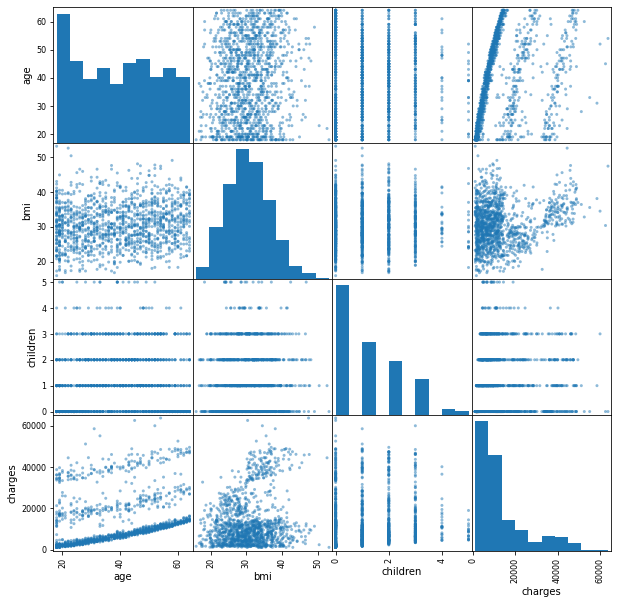

In [ ]:
 #EDA
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline
#fig = plt.figure(figsize = (10,10))
scatter_matrix(ins[["age", "bmi","children", "charges"]], figsize = (10,10))
plt.xticks(rotation = 90)
plt.show()

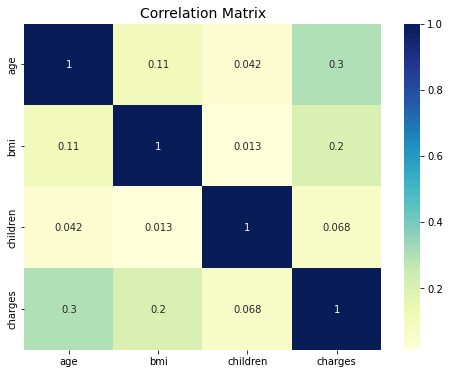

In [ ]:
# Checking correlation coeff using a heatmap
import seaborn as sns
ins_corr = ins.corr()
plt.figure(figsize = (8,6))
sns.heatmap(ins_corr, annot = True, cmap = "YlGnBu")
plt.title("Correlation Matrix", fontsize = 14)
plt.show()

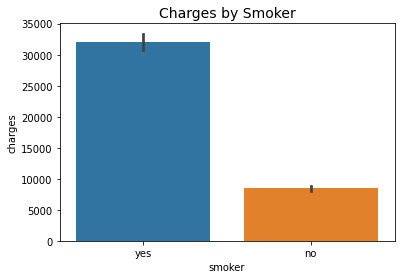

In [ ]:
sns.barplot(data=ins, x = "smoker", y = "charges")
plt.title("Charges by Smoker", fontsize = 14)
plt.show()

In [ ]:
 df=pd.read_csv("/content/drive/MyDrive/Academic Year 2022-23/DMBI/insurance.csv")
# Load Data sheet of excel file
 #count of each variables
 df['sex'].value_counts()
 df['smoker'].value_counts()
 df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

Text(0.5, 1.0, 'charges distribution')

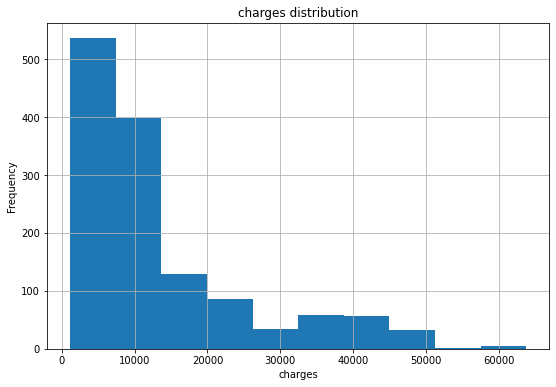

In [ ]:
#EDA
plt.figure(figsize=(9,6))
df['charges'].hist()
plt.ylabel('Frequency')
plt.xlabel('charges')
plt.title('charges distribution')
#we can see that the charges were mostly saturated around 10,000 below.

Text(0.5, 1.0, 'Age distribution')

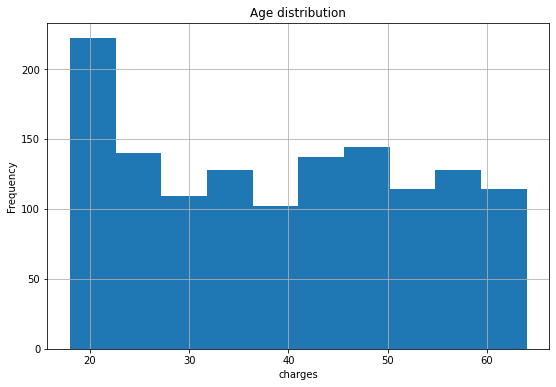

In [ ]:
#analyzed each variables that could have an effect to the Charges
#By Age
plt.figure(figsize=(9,6))
df['age'].hist()
plt.ylabel('Frequency')
plt.xlabel('charges')
plt.title('Age distribution')

Text(0, 0.5, 'charges')

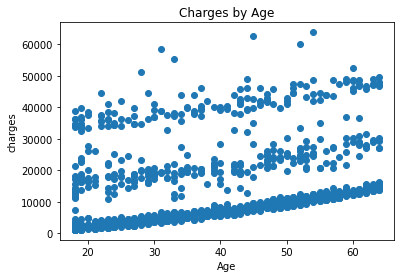

In [ ]:
plt.scatter('age','charges',data=df)
plt.title('Charges by Age')
plt.xlabel('Age')
plt.ylabel('charges')
#that the charges increase with respect to age. We can also see that the ages who usually invests were mostly around their 20s.

<Figure size 1152x648 with 0 Axes>

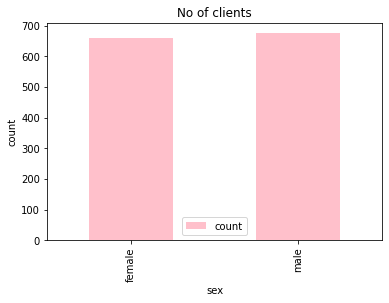

In [ ]:
#By Sex
my_colors = ("pink" , "green")
plt.figure(figsize=(16,9))
df.groupby(['sex'])['age'].agg(['count']).sort_values("sex",ascending=True).plot.bar(color=my_colors,)
plt.ylabel('count')
plt.xlabel('sex')
plt.title('No of clients')
plt.show()


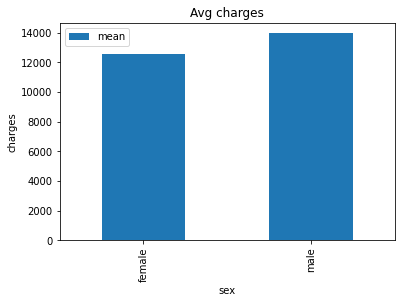

In [ ]:
df.groupby(['sex'])['charges'].agg(['mean']).plot.bar()
plt.ylabel('charges')
plt.xlabel('sex')
plt.title('Avg charges')
plt.show()
#the data approximately has an equal count for both Female and Male. However, on average we can see that Males are charged a bit higher than their female counterpart.

<Figure size 2304x1296 with 0 Axes>

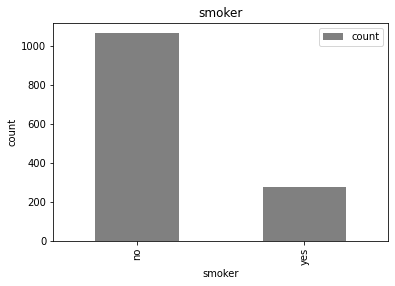

In [ ]:
my_colors = (("grey" ,"green"))
plt.figure(figsize=(32,18))
df.groupby(['smoker'])['age'].agg(['count']).sort_values("smoker",ascending=True).plot.bar(color=my_colors)
plt.ylabel('count')
#plt.xlabel('')
plt.title('smoker')
plt.show()

Text(0.5, 1.0, 'Average Charges')

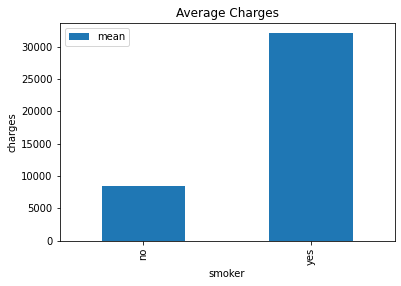

In [ ]:
df.groupby(['smoker'])['charges'].agg(['mean']).plot.bar()
plt.ylabel('charges')
plt.xlabel('smoker')
plt.title('Average Charges')
#oker tends to be charged much higher as compared to non-smoker. Smokers are usually charged for over 30000 and below 15000 are generally non-smokers.

Text(0.5, 1.0, 'BMI distribution')

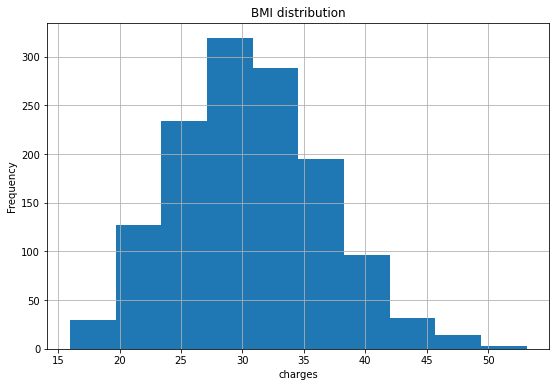

In [ ]:
plt.figure(figsize=(9,6))
df['bmi'].hist()
plt.ylabel('Frequency')
plt.xlabel('charges')
plt.title('BMI distribution')

Text(0, 0.5, 'charges')

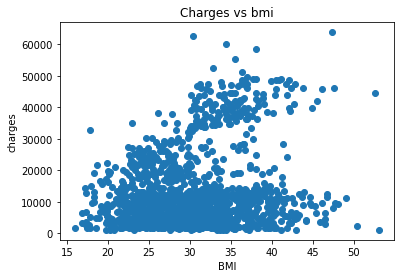

In [ ]:
plt.scatter('bmi','charges',data=df)
plt.title('Charges vs bmi')
plt.xlabel('BMI')
plt.ylabel('charges')

<Figure size 1152x648 with 0 Axes>

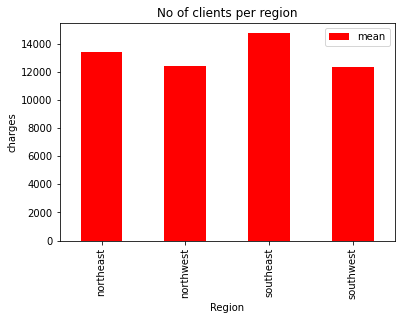

In [ ]:
my_colors = ['red','green','blue','yellow']
plt.figure(figsize=(16,9))
df.groupby(['region'])['charges'].agg(['mean']).sort_values("region",ascending=True).plot.bar(color=my_colors)
plt.ylabel('charges')
plt.xlabel('Region')
plt.title('No of clients per region')
plt.show()
# we can see from the graph that individuals from South East has a wider range of charges, while people from South West, North West, and North East are mostly charged lower than in the South East.


smoking plays a big factor that affects Insurance Charges compared to other variables we have analyzed. Being a smoker, can approximately increase the charges by 25,000 regardless of age. Thereafter, the charges increase with age, bmi (higher health risk).

In [ ]:
grp_by_smoker = ins.groupby("smoker")
avg_charge_by_smoker = grp_by_smoker["charges"].mean()
(avg_charge_by_smoker["yes"] - avg_charge_by_smoker["no"])/avg_charge_by_smoker["no"]*100
#The charges vary depending whether or not one is smoker.

280.0001458298318

In [ ]:
avg_charge_by_smoker


smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

In [ ]:
grp_by_age = ins.groupby([pd.cut(ins["age"], bins = 5), "smoker"])
mean_charges_by_age = grp_by_age["charges"].mean().reset_index()
mean_charges_by_age.age = mean_charges_by_age.age.astype("str")
mean_charges_by_age.groupby("age")["charges"].sum()

mean_charges_by_age["total_charges_by_age"] = mean_charges_by_age.groupby("age").transform(np.sum)["charges"]

In [ ]:
mean_charges_by_age_smoke = mean_charges_by_age.pivot(index = 'age', columns = "smoker", values = "charges").copy()
mean_charges_by_age_smoke

smoker,no,yes
age,,
"(17.954, 27.2]",4137.989931,27457.382643
"(27.2, 36.4]",5998.176866,29664.755384
"(36.4, 45.6]",8048.552697,32295.172825
"(45.6, 54.8]",11438.346490,34816.508707
"(54.8, 64.0]",14064.827492,39696.365439
